# Nevergrad による CMA-ES の実装

## ライブラリのインストール

In [ ]:
!pip install -q nevergrad==0.6.0

## ライブラリのインポート

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Nevergrad
import nevergrad as ng

## 目的関数の定義
- 今回は Rosenbrock （ローゼンブロック）関数を使用
- Rosenbrock 関数：$ f(x_1 \cdots x_n) = \sum_{i=1}^{n-1} (100(x_i^2 - x_{i+1})^2 + (1-x_i)^2) $
    - $x_1 = x_2 = \cdots = x_n = 1$ なら最小値  $f(1 \cdots 1) = 0 $ を返す
    - Rosenbrock 関数は最適化アルゴリズムの性能を測るベンチマークとして良く用いられる関数
- $n$ 個の入力 $x_1 \cdots x_n$ を踏まえて，出力 $f(x_1 \cdots x_n)$ を最小化する

In [ ]:
class Rosenbrock():
    
    # Rosenbrock 関数の値を得るメソッド
    # 入力：n 次元のベクトル
    # 出力：1次元（スカラー）
    def get_function_value(self, x): 
        # 入力ベクトルを NumPy 配列に変換
        x = np.array(x) 
        # 関数の出力値を計算
        y = 0
        for i in range(0, len(x) - 1):
            t1 = 100 * (x[i + 1] - x[i] ** 2) ** 2
            t2 = (1 - x[i]) ** 2
            y += t1 + t2
        return y
    
    # 2 変数 Rosenbrock 関数を可視化するメソッド
    def visualize(self):
        # 全体の点数
        num_point = 200
        
        # 入力 X1：-4 ~ 4 を num_point 等分した値を生成 
        X1 = np.linspace(-4, 4, num_point)
        
        # 入力 X2：-4 ~ 4 を num_point 等分した値を生成
        X2 = np.linspace(-4, 4, num_point)    

        # 入力の組み合わせを生成
        grid_X1, grid_X2 = np.meshgrid(X1, X2)

        # X1 と X2 を入力して，関数の出力 Y を得る
        Y = [] # 各入力の組み合わせに対する出力 Y を入れるためのリスト
        for i in range(200):
            for j in range(200):
                # 入力の組を取得
                input_values = [grid_X1[i, j], grid_X2[i, j]]
                # 入力に対する出力を取得
                output_value = self.get_function_value(input_values)
                # 出力をリストに追加
                Y.append(output_value)
        
        # 出力 Y をまとめたリストを NumPy 配列に変更
        Y = np.array(Y)
        
        # 出力 Y を grid_X1 (grid_X2) と同じ shape に変更
        grid_Y = np.reshape(Y, (num_point, num_point))
        
        # 描画領域を定義
        fig = plt.figure()
        
        # 3次元描画用の axes を生成
        ax = fig.add_subplot(111, projection="3d")
        
        # 軸ラベルを設定
        ax.set_xlabel("Input x1", size=16)
        ax.set_ylabel("Input x2", size=16)
        ax.set_zlabel("Objective y", size=16)

        # 関数を可視化
        ax.plot_surface(grid_X1, # 入力 X1
                        grid_X2, # 入力 X2
                        grid_Y, # 出力 Y
                        cmap="bwr") # 色の設定
        
        plt.show()

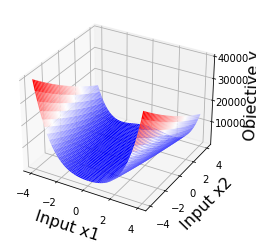

In [ ]:
# 2変数 Rosenbrock 関数を可視化
f = Rosenbrock()
f.visualize()

## CMA-ES のセットアップ

In [ ]:
# 次元数（= 最適化したい変数の数）
dim = 20

# 最大評価回数
budget = 10000

# サンプル数（CMA-ESのデフォルト値）
popsize = 4 + int(3 * np.log(dim))
print(f"サンプル数：{popsize}")

# CMA-ES のセットアップ
optimizer = ng.families.ParametrizedCMA(
    scale=1., # 標準偏差
    popsize=popsize, # サンプル数
    popsize_factor=1., # サンプル数の倍率
)(
    parametrization=dim, # 次元数
    budget=budget # 最大評価回数
)

サンプル数：12


## CMA-ES による最適化の実行

In [ ]:
# 最適化を実行し、最良個体を取り出す
best_x = optimizer.minimize(f.get_function_value).value

In [ ]:
# 最良個体を確認（各次元が 1 に近いほど良い）
best_x

array([-0.98568277,  0.9846806 ,  0.99841425,  1.00049978,  0.99535116,
        0.99755989,  0.99724891,  0.99903868,  0.9949318 ,  0.99057092,
        0.97754183,  0.9630394 ,  0.93954892,  0.88590846,  0.78857667,
        0.61926977,  0.37630109,  0.12606532,  0.02213458,  0.01801519])

In [ ]:
# 最良個体に対応する目的関数値を確認（ 0 に近いほど良い）
f.get_function_value(best_x)

6.462047410121894